<a href="https://colab.research.google.com/github/dormeneur/MLforRobotics/blob/main/LAB7_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAMPLE 1

Epoch 1/10
Weights: [0.1 0.1]
Bias: 0.0
Total Error: 2
----------------------
Epoch 2/10
Weights: [0.2 0.1]
Bias: -0.1
Total Error: 3
----------------------
Epoch 3/10
Weights: [0.2 0.1]
Bias: -0.20000000000000004
Total Error: 3
----------------------
Epoch 4/10
Weights: [0.2 0.1]
Bias: -0.20000000000000004
Total Error: 0
----------------------
Epoch 5/10
Weights: [0.2 0.1]
Bias: -0.20000000000000004
Total Error: 0
----------------------
Epoch 6/10
Weights: [0.2 0.1]
Bias: -0.20000000000000004
Total Error: 0
----------------------
Epoch 7/10
Weights: [0.2 0.1]
Bias: -0.20000000000000004
Total Error: 0
----------------------
Epoch 8/10
Weights: [0.2 0.1]
Bias: -0.20000000000000004
Total Error: 0
----------------------
Epoch 9/10
Weights: [0.2 0.1]
Bias: -0.20000000000000004
Total Error: 0
----------------------
Epoch 10/10
Weights: [0.2 0.1]
Bias: -0.20000000000000004
Total Error: 0
----------------------


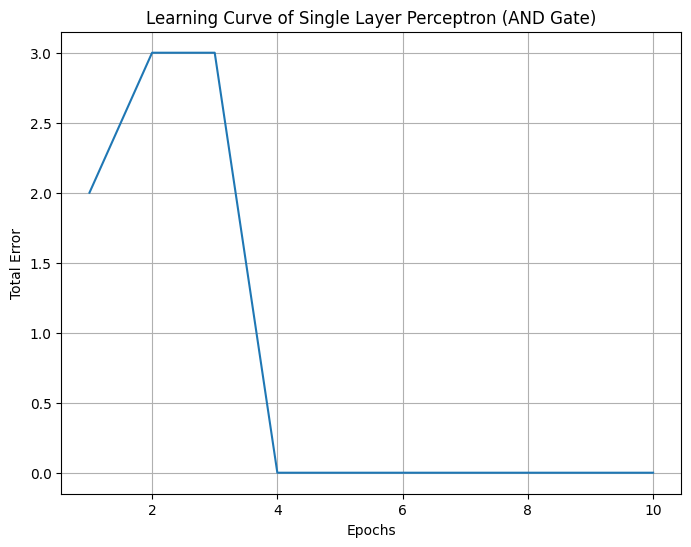


--- Final Perceptron Test ---
Input: [0 0], Expected Output: 0, Predicted Output: 0
Input: [0 1], Expected Output: 0, Predicted Output: 0
Input: [1 0], Expected Output: 0, Predicted Output: 0
Input: [1 1], Expected Output: 1, Predicted Output: 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

w = np.zeros(2)
b = 0
eta = 0.1
n_epochs = 10

errors_per_epoch = []

for epoch in range(n_epochs):
    total_error = 0
    for i in range(len(X)):
        z = np.dot(X[i], w) + b
        y_pred = 1 if z >= 0 else 0
        error = y[i] - y_pred
        w = w + eta * error * X[i]
        b = b + eta * error
        total_error += abs(error)

    errors_per_epoch.append(total_error)

    print(f"Epoch {epoch+1}/{n_epochs}")
    print("Weights:", w)
    print("Bias:", b)
    print("Total Error:", total_error)
    print("----------------------")

plt.figure(figsize=(8, 6))
plt.plot(range(1, n_epochs + 1), errors_per_epoch)
plt.xlabel("Epochs")
plt.ylabel("Total Error")
plt.title("Learning Curve of Single Layer Perceptron (AND Gate)")
plt.grid(True)
plt.show()

print("\n--- Final Perceptron Test ---")
for i in range(len(X)):
    z = np.dot(X[i], w) + b
    y_pred = 1 if z >= 0 else 0
    print(f"Input: {X[i]}, Expected Output: {y[i]}, Predicted Output: {y_pred}")


# SAMPLE 2

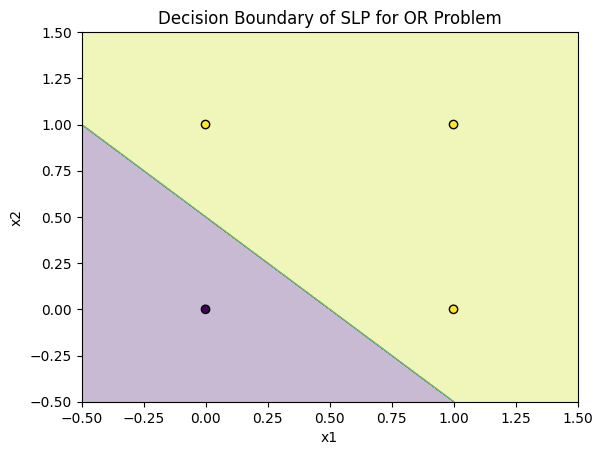

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# Give inputs and outputs (OR Gate)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 1, 1, 1])

# training
slp = Perceptron(max_iter=1000, eta0=0.1, random_state=1)
slp.fit(X, y)

# Create mesh grid
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Predict over grid
Z = slp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary of SLP for OR Problem")
plt.show()


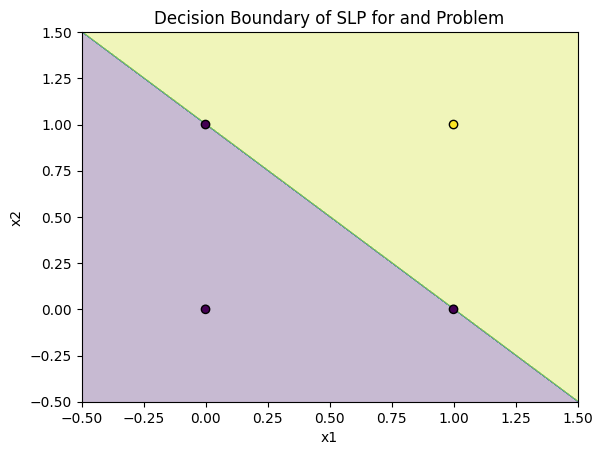

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

# Give inputs and outputs (OR Gate)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 0, 0, 1])

# training
slp = Perceptron(max_iter=1000, eta0=0.1, random_state=1)
slp.fit(X, y)

# Create mesh grid
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Predict over grid
Z = slp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary of SLP for and Problem")
plt.show()


# SAMPLE 3

Predicted Output: [0 1 1 0]
Actual Output   : [0 1 1 0]


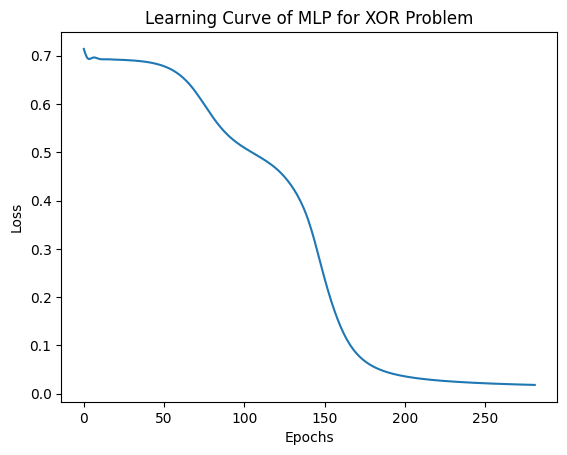

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# XOR dataset (inputs and true outputs)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 1, 1, 0])

# MLP model
mlp = MLPClassifier(
    hidden_layer_sizes=(2,),
    activation='logistic',
    solver='sgd',
    learning_rate_init=0.5,
    max_iter=5000,
    random_state=1
)

# Train model
mlp.fit(X, y)

# Predict
pred = mlp.predict(X)

print("Predicted Output:", pred)
print("Actual Output   :", y)

# Plot learning curve
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve of MLP for XOR Problem")
plt.show()


Predicted Output: [0 0 0 1]
Actual Output   : [0 0 0 1]


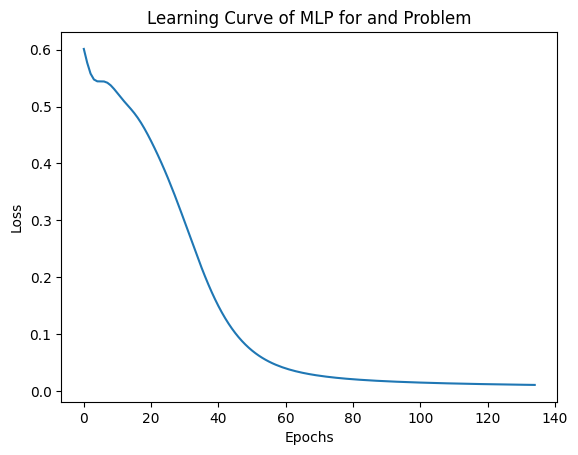

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# XOR dataset (inputs and true outputs)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 0, 0 ,1])

# MLP model
mlp = MLPClassifier(
    hidden_layer_sizes=(2,),
    activation='logistic',
    solver='sgd',
    learning_rate_init=0.5,
    max_iter=5000,
    random_state=1
)

# Train model
mlp.fit(X, y)

# Predict
pred = mlp.predict(X)

print("Predicted Output:", pred)
print("Actual Output   :", y)

# Plot learning curve
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve of MLP for and Problem")
plt.show()


# SAMPLE 4

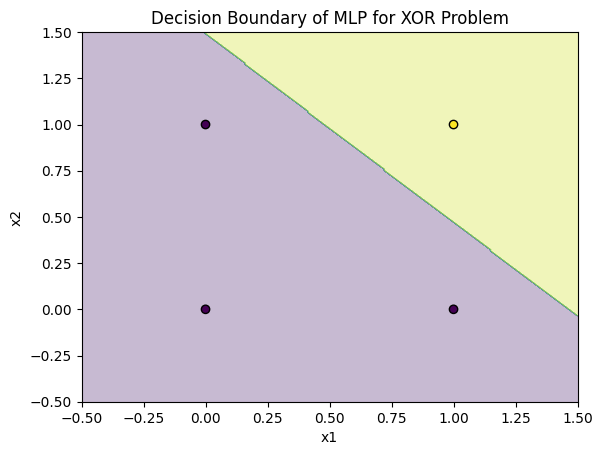

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid limits
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5

# Create mesh grid
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Predict over grid
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary of MLP for XOR Problem")
plt.show()


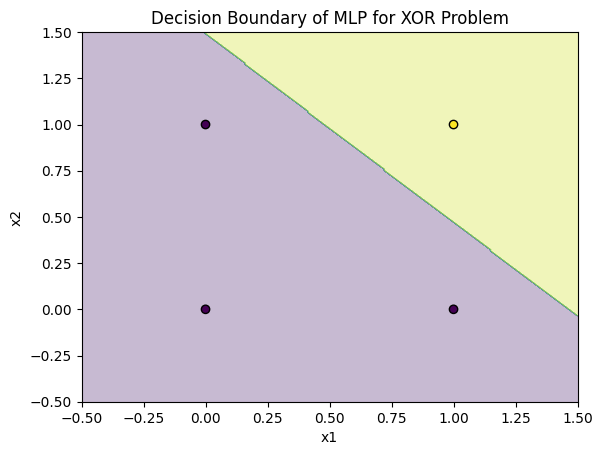

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define grid limits
x_min, x_max = -0.5, 1.5
y_min, y_max = -0.5, 1.5

# Create mesh grid
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Predict over grid
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary of MLP for XOR Problem")
plt.show()

# SAMPLE 5

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8


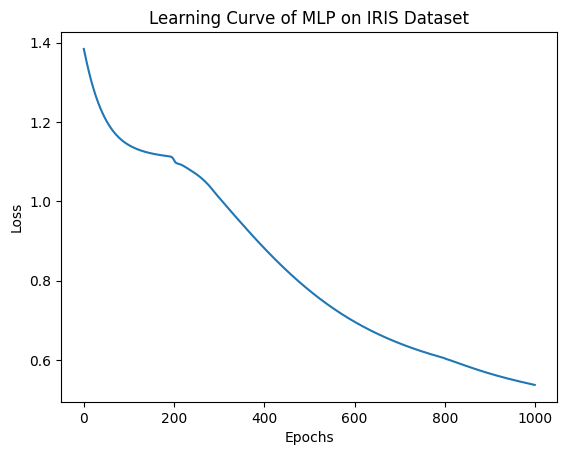

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load IRIS dataset
iris = load_iris()
X = iris.data[:, :2] # Use only the first two features for plotting
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# MLP model
mlp = MLPClassifier(
    hidden_layer_sizes=(10,),
    activation='relu',
    max_iter=1000,
    random_state=1
)

# Train model
mlp.fit(X_train, y_train)

# Predict
y_pred = mlp.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot learning curve
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve of MLP on IRIS Dataset")
plt.show()

# EXERCISE 1

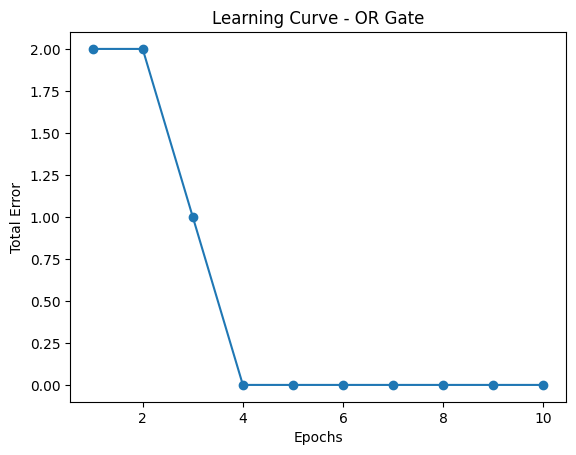

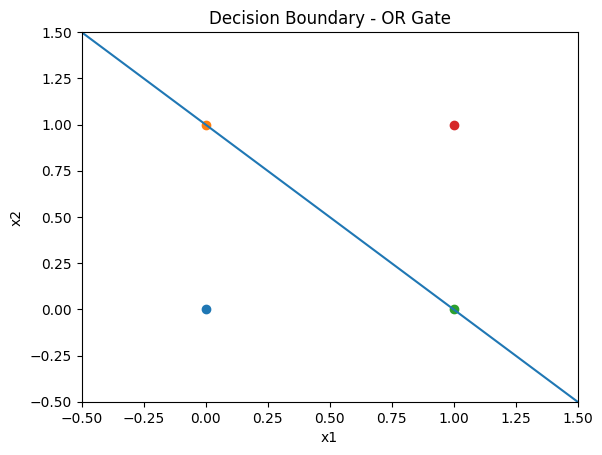

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# OR Gate Data
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y = np.array([0,1,1,1])   # OR output

# Initialize
w = np.zeros(2)
b = 0
eta = 0.1
epochs = 10

errors_per_epoch = []

# Training
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        z = np.dot(X[i], w) + b
        y_pred = 1 if z >= 0 else 0
        error = y[i] - y_pred

        w = w + eta * error * X[i]
        b = b + eta * error
        total_error += abs(error)

    errors_per_epoch.append(total_error)

# -------- Learning Curve --------
plt.figure()
plt.plot(range(1, epochs+1), errors_per_epoch, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Total Error")
plt.title("Learning Curve - OR Gate")
plt.show()

# -------- Decision Boundary --------
plt.figure()

# plot points
for i in range(len(X)):
    if y[i] == 1:
        plt.scatter(X[i][0], X[i][1])
    else:
        plt.scatter(X[i][0], X[i][1])

# decision line: w1*x1 + w2*x2 + b = 0
x_vals = np.linspace(-0.5,1.5,100)
y_vals = -(w[0]*x_vals + b)/w[1]
plt.plot(x_vals, y_vals)

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary - OR Gate")
plt.xlim(-0.5,1.5)
plt.ylim(-0.5,1.5)
plt.show()


# EXERCISE 2

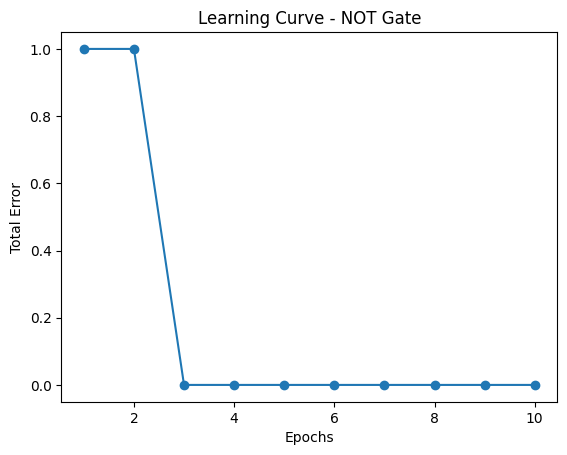

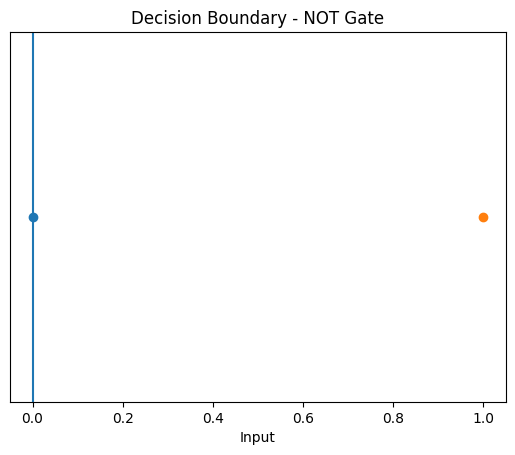

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# NOT Gate Data
X = np.array([
    [0],
    [1]
])

y = np.array([1,0])   # NOT output

# Initialize
w = np.zeros(1)
b = 0
eta = 0.1
epochs = 10

errors_per_epoch = []

# Training
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        z = np.dot(X[i], w) + b
        y_pred = 1 if z >= 0 else 0
        error = y[i] - y_pred

        w = w + eta * error * X[i]
        b = b + eta * error
        total_error += abs(error)

    errors_per_epoch.append(total_error)

# -------- Learning Curve --------
plt.figure()
plt.plot(range(1, epochs+1), errors_per_epoch, marker='o')
plt.xlabel("Epochs")
plt.ylabel("Total Error")
plt.title("Learning Curve - NOT Gate")
plt.show()

# -------- Decision Boundary --------
plt.figure()

# Plot points on x-axis
for i in range(len(X)):
    plt.scatter(X[i][0], 0)

# boundary point: w*x + b = 0  => x = -b/w
boundary = -b / w[0]
plt.axvline(boundary)

plt.title("Decision Boundary - NOT Gate")
plt.xlabel("Input")
plt.yticks([])
plt.show()


# EXERCISE 3

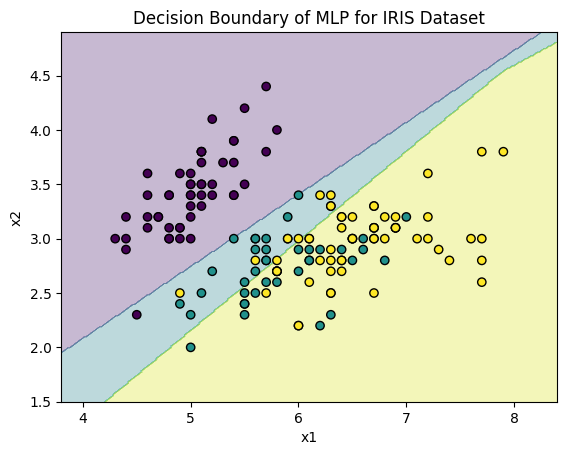

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Use only 2 features for plotting
X_plot = X[:, :2]   # Sepal length, Sepal width

# Define grid limits
x_min, x_max = X_plot[:, 0].min() - 0.5, X_plot[:, 0].max() + 0.5
y_min, y_max = X_plot[:, 1].min() - 0.5, X_plot[:, 1].max() + 0.5

# Create mesh grid
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Predict over grid
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary of MLP for IRIS Dataset")
plt.show()

# EXERCISE 4

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


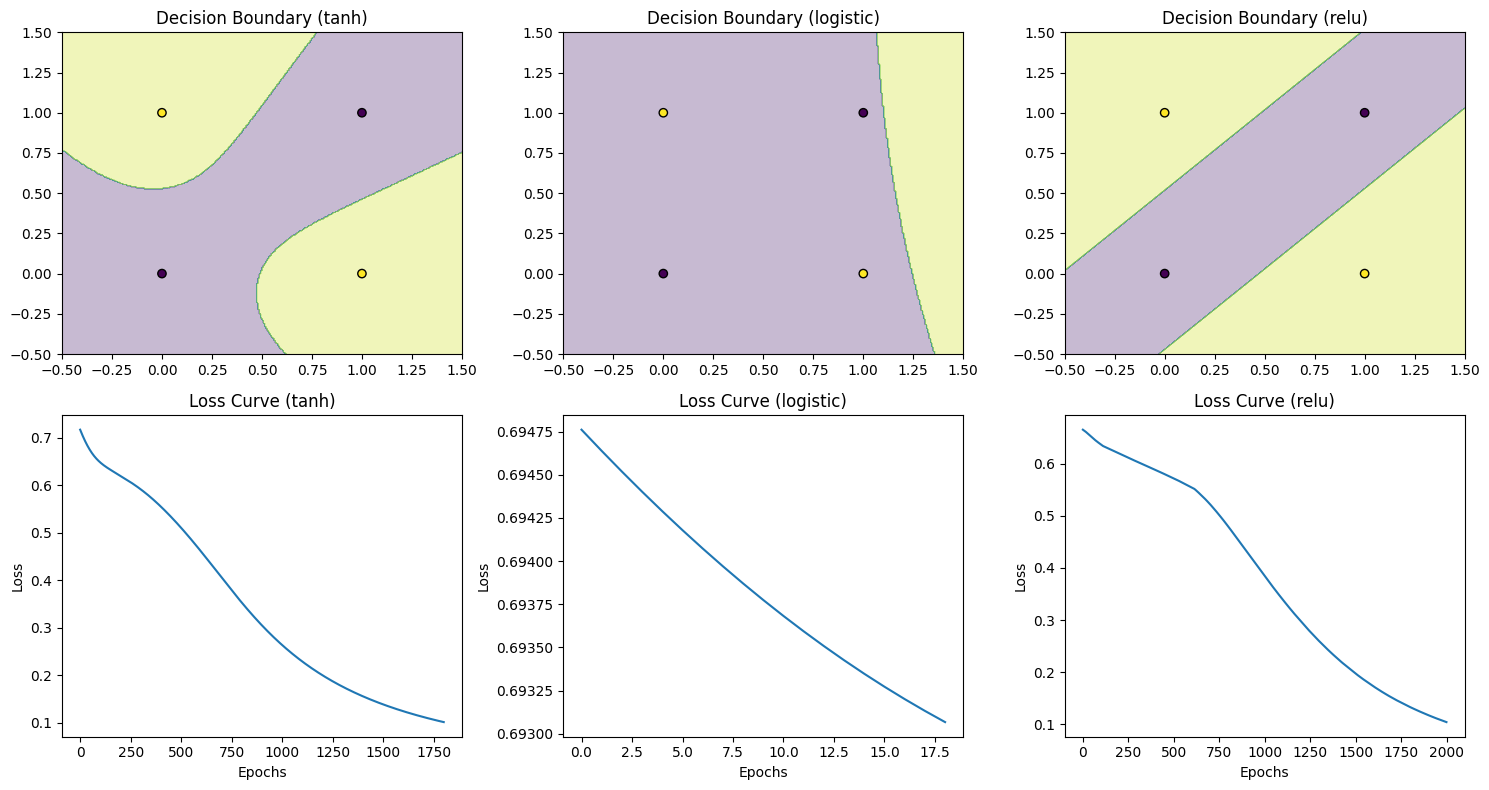

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

# XOR Dataset
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
y = np.array([0,1,1,0])

activations = ["tanh", "logistic", "relu"]

plt.figure(figsize=(15,8))

for i, act in enumerate(activations):

    mlp = MLPClassifier(
        hidden_layer_sizes=(4,),
        activation=act,
        max_iter=2000,
        random_state=1
    )

    mlp.fit(X, y)

    # ---------- Decision Boundary ----------
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2,3,i+1)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors="k")
    plt.title(f"Decision Boundary ({act})")

    # ---------- Loss Curve ----------
    plt.subplot(2,3,i+4)
    plt.plot(mlp.loss_curve_)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Loss Curve ({act})")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


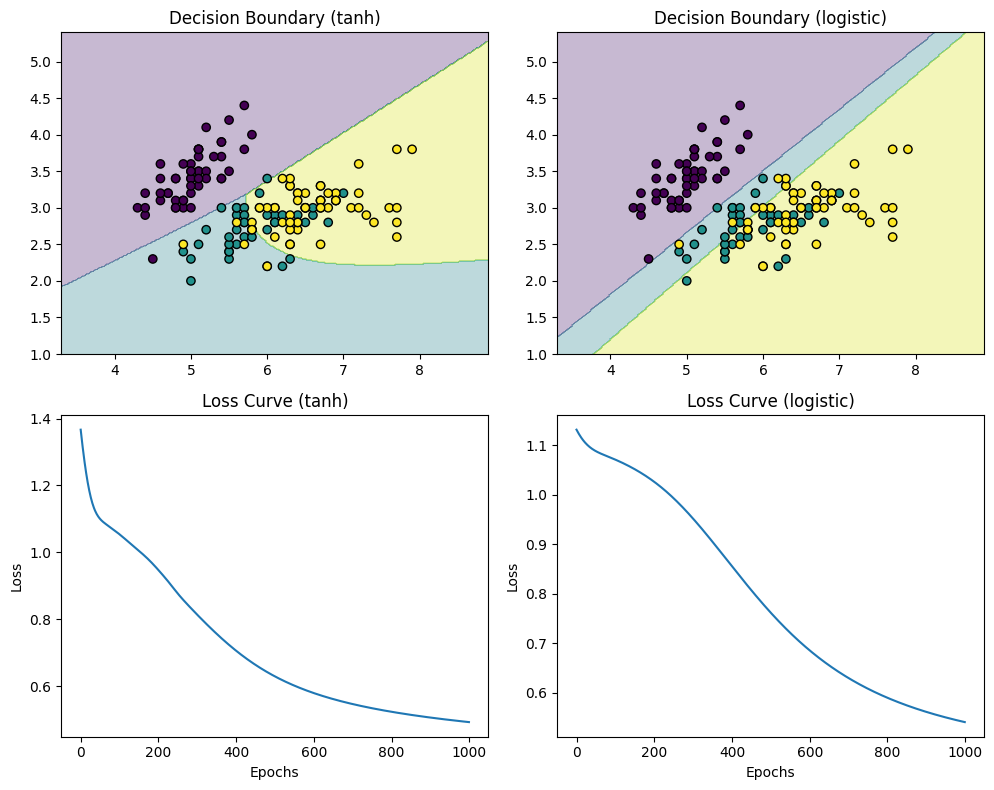

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Load IRIS
iris = load_iris()

# Use only first 2 features for boundary plotting
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

activations = ["tanh", "logistic"]

plt.figure(figsize=(15,8))

for i, act in enumerate(activations):

    mlp = MLPClassifier(
        hidden_layer_sizes=(10,),
        activation=act,
        max_iter=1000,
        random_state=1
    )

    mlp.fit(X_train, y_train)

    # ---------- Decision Boundary ----------
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2,3,i+1)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors="k")
    plt.title(f"Decision Boundary ({act})")

    # ---------- Loss Curve ----------
    plt.subplot(2,3,i+4)
    plt.plot(mlp.loss_curve_)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Loss Curve ({act})")

plt.tight_layout()
plt.show()


# EXERCISE 5

Accuracy: 0.8333333333333334


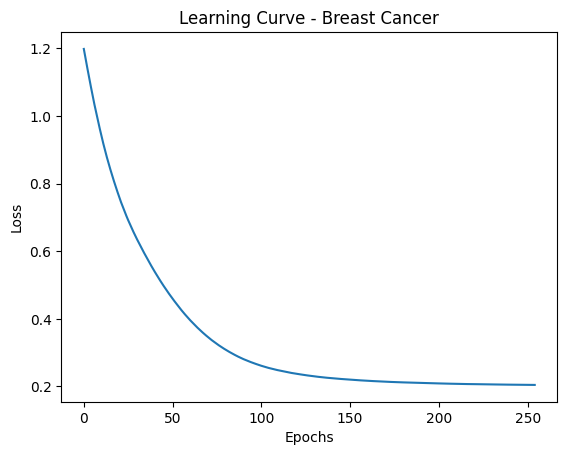

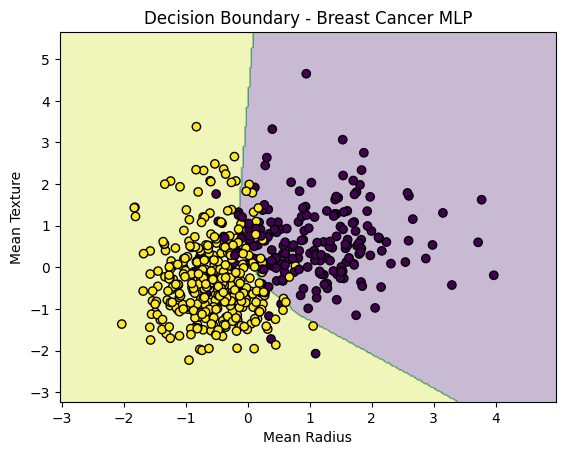

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Load Dataset

data = load_breast_cancer()

# Use ONLY 2 features for visualization
X = data.data[:, [0,1]]
y = data.target


# Scaling

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# MLP Model

mlp = MLPClassifier(
    hidden_layer_sizes=(10,10),
    activation='relu',
    max_iter=1000,
    random_state=1
)

mlp.fit(X_train, y_train)


# Accuracy

y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


# Learning Curve

plt.figure()
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve - Breast Cancer")
plt.show()


# Decision Boundary

x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors="k")
plt.xlabel("Mean Radius")
plt.ylabel("Mean Texture")
plt.title("Decision Boundary - Breast Cancer MLP")
plt.show()


# EXERCISE 6

Accuracy: 0.6083333333333333


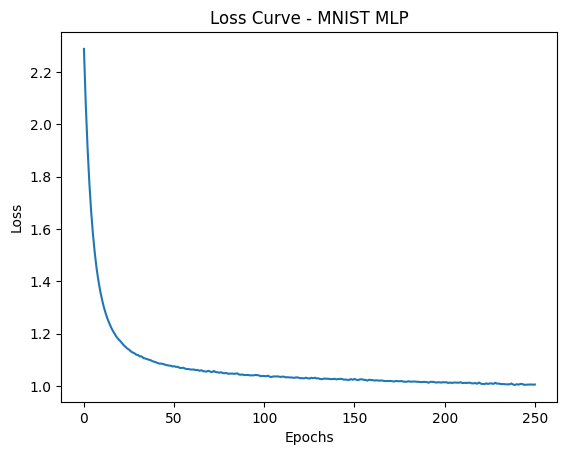

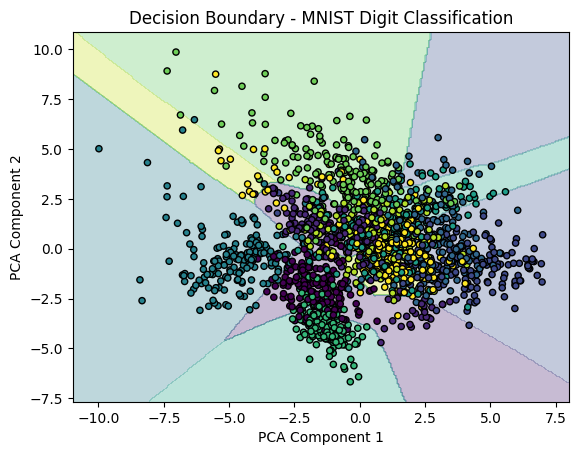

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


digits = load_digits()
X = digits.data
y = digits.target

# Scale Features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Reduce to 2D for decision boundary

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=1
)


# MLP Model

mlp = MLPClassifier(
    hidden_layer_sizes=(50,50),
    activation='relu',
    max_iter=1000,
    random_state=1
)

mlp.fit(X_train, y_train)


# Accuracy

y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


# Loss Curve

plt.figure()
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve - MNIST MLP")
plt.show()


# Decision Boundary

x_min, x_max = X_pca[:,0].min()-1, X_pca[:,0].max()+1
y_min, y_max = X_pca[:,1].min()-1, X_pca[:,1].max()+1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, edgecolors="k", s=20)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Decision Boundary - MNIST Digit Classification")
plt.show()


# EXERCISE 7

MSE: 0.2685606058248019
R2 Score: 0.7952561709620933


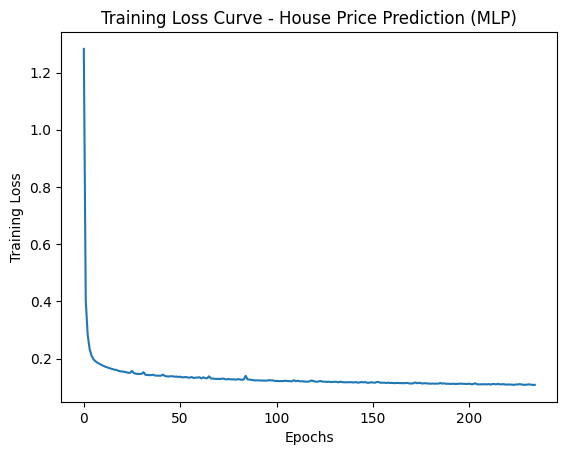

The training loss decreases smoothly over epochs, indicating stable learning and proper convergence of the MLP model.
 The absence of large oscillations suggests that the learning rate is well chosen. As the loss curve flattens toward later epochs, the model approaches a minimum error, demonstrating successful convergence.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = fetch_california_housing()
X = data.data
y = data.target


# Feature Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=1
)


# MLP Regressor

mlp = MLPRegressor(
    hidden_layer_sizes=(50,50),
    activation='relu',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=1
)

# Train
mlp.fit(X_train, y_train)

# Predictions

y_pred = mlp.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


# Plot Training Loss

plt.figure()
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Training Loss")
plt.title("Training Loss Curve - House Price Prediction (MLP)")
plt.show()


print("The training loss decreases smoothly over epochs, indicating stable learning and proper convergence of the MLP model.\n The absence of large oscillations suggests that the learning rate is well chosen. As the loss curve flattens toward later epochs, the model approaches a minimum error, demonstrating successful convergence.")
